46807365267.057625


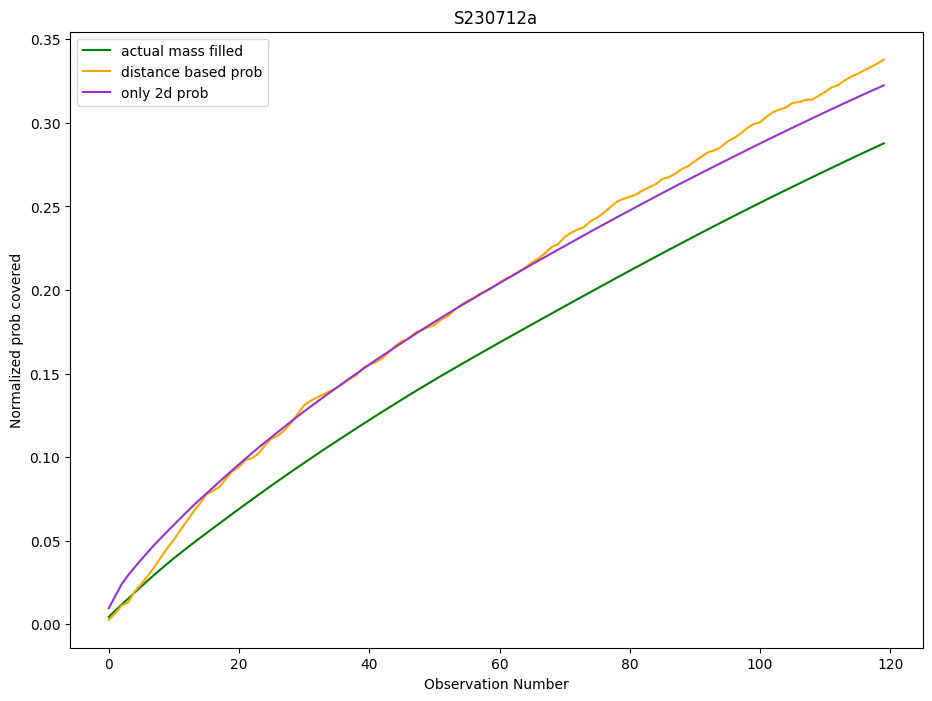

0.8923785810211735


In [6]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt

df = pd.read_csv('S230712a_non_overlap.csv')
sigma_m_nonempty = np.array(df['Filled3D'])
sigma_m_empty_dist = np.array(df['Unfilled3D'])
sigma_m_empty_nodist = np.array(df['Unfilled2D'])

print(np.sum(sigma_m_empty_nodist))

nobs = 120

#sigma_m = sigma_m[:1008]

fullsum = np.sum(sigma_m_nonempty)
a1 = np.cumsum(np.flip(np.sort(sigma_m_nonempty)[-nobs:])) / fullsum

order_dist = np.flip(np.argsort(sigma_m_empty_dist)[-nobs:])
order_nodist = np.flip(np.argsort(sigma_m_empty_nodist)[-nobs:])

fullsum = np.sum(sigma_m_empty_dist)
a2 = np.cumsum((sigma_m_empty_dist)[order_nodist]) / fullsum
fullsum = np.sum(sigma_m_empty_nodist)
a3 = np.cumsum((sigma_m_empty_nodist)[order_nodist]) / fullsum

plt.figure(figsize=(11,8))
plt.plot(a1, color='green', label='actual mass filled')
plt.plot(a2, color='orange', label = 'distance based prob')
plt.plot(a3, color='darkorchid', label = 'only 2d prob')
plt.legend()
plt.xlabel('Observation Number')
plt.ylabel('Normalized prob covered')
plt.title('S230712a')
plt.show()

print(a1[-1]/a3[-1])

Within 99%

1. Take 10 random sightlines and find the mass of known galaxies vs the mass filled galaxies along that line of sight - plots
2. Use simulated skymaps from injected data - plots
3. Use those skymaps that have median distance less than 200 (first nearby BNS)
4. One function to create tiling order (2D, 3D or 3D with missing), and a separate function to evaluate actual prob covered
5. Go through paper on MMA Slack
6. Overlap pixels - must not be double counted

<Figure size 1200x1000 with 0 Axes>

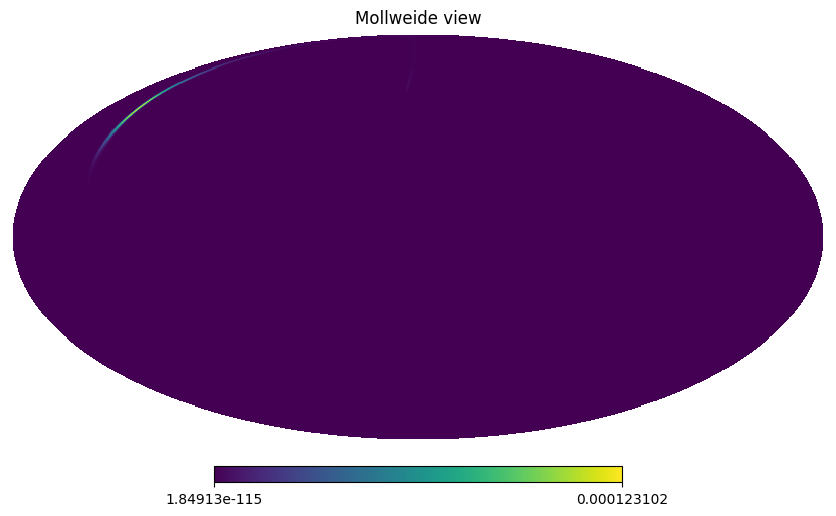

In [5]:
#import ligo.skymap.io
#import healpy as hp

skym = ligo.skymap.io.fits.read_sky_map('bayestar.multiorder.fits,1', distances=True)
skymap = skym[0][0]

plt.figure(figsize=(12,10))
hp.mollview(skym[0][0])

## Random Sightlines Code

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


mm = pd.read_csv('missing_mass.csv')
df = pd.read_csv('reduced_gal_cat.csv')

In [13]:
tiles = pd.read_csv('O4/O4/tiles_GIT_7.csv')
tiles

,Unnamed: 0,Tile No,RA_Center,DEC_Center
0,0,0,0.000000,-33.00
1,1,1,0.847059,-33.00
2,2,2,1.694118,-33.00
3,3,3,2.541176,-33.00
4,4,4,3.388235,-33.00
...,...,...,...,...
76373,76373,76373,360.000000,89.13
76374,76374,76374,0.000000,89.72
76375,76375,76375,180.000000,89.72
76376,76376,76376,360.000000,89.72


In [17]:
import healpy as hp
import astropy.units as u

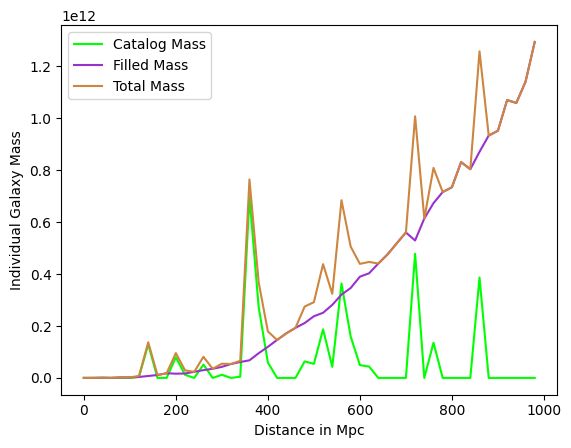

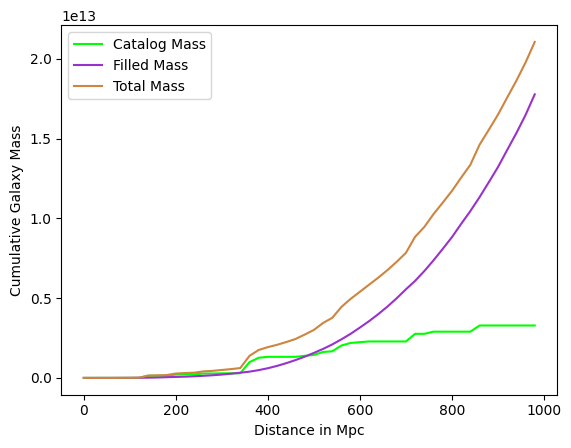

In [31]:
nside_skymap = 512
radius = 0.35*u.deg
fact=1

catmass = np.zeros(50)
fillmass = np.zeros(50)


ra, dec = 120*u.deg, 30*u.deg


vecs = hp.ang2vec(ra.to(u.deg).value, dec.to(u.deg).value, lonlat=True)
sel_pix = hp.query_disc(nside_skymap, vecs, radius.to(u.rad).value, inclusive=True, fact=fact)

for t in sel_pix:
    dfn = df[df.PIX_ID_512 == t]
    for i in range(50):
        dfd = dfn[(dfn.Dist > mm.distmin[i]) & (dfn.Dist <= mm.distmax[i])]
        if len(dfd)==0:
            fillmass[i] += mm.masstofill[i] / mm.num_empty_pixels[i]
        else:
            catmass[i] += np.sum(dfd.Mstar)
        
plt.plot(np.arange(0,1000,20), catmass, color='lime', label='Catalog Mass')
plt.plot(np.arange(0,1000,20), fillmass, color='darkorchid', label='Filled Mass')
plt.plot(np.arange(0,1000,20), catmass+fillmass, color='peru', label='Total Mass')
plt.xlabel('Distance in Mpc')
plt.ylabel('Individual Galaxy Mass')
plt.legend()
plt.show()

plt.plot(np.arange(0,1000,20), np.cumsum(catmass), color='lime', label='Catalog Mass')
plt.plot(np.arange(0,1000,20), np.cumsum(fillmass), color='darkorchid', label='Filled Mass')
plt.plot(np.arange(0,1000,20), np.cumsum(catmass+fillmass), color='peru', label='Total Mass')
plt.xlabel('Distance in Mpc')
plt.ylabel('Cumulative Galaxy Mass')
plt.legend()
plt.show()